# Project Name: Insurance Prediction: Regression Technique
The main aim of this project is to predict the insurance qoute based on various features

1. Loading the Raw Data
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
          a. Data Cleansing/wrangling/munging
          b. Feature Engineering (Scaling, Encoding) with Pipeline
4. Model Selection using GridSearchCV 
          a. Split Dataset into Training set and Test set
          b. Select and Train a few Algorithms(Linear Regression, Decision Tree, Random Forest)
5. Model Building
6. Model Evaluation
          a. Mean Squared Error
7. Model Testing
8. Save Model(Pickel)
8. Model Deployment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./insurance.csv') 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

### Exploratory Data Analysis
1. Find Duplicate Values
2. Find Missing Values
3. Find Features with one value
4. Explore the Categorical Features
5. Find Categorical Feature Distribution
6. Relationship between Categorical Features and Label
7. Explore the Numerical Features
8. Find Discrete Numerical Features
9. Relation between Discrete numerical Features and Labels
10. Find Continous Numerical Features
11. Distribution of Continous Numerical Features
12. Relation between Continous numerical Features and Labels
13. Find Outliers in numerical features
14. Explore the Correlation between numerical features

1. Find Duplicate Values 

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

2. Find Missing Values 

In [7]:
df.isna().sum().sum()

0

3. Find Features with one value

In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

4. Explore the Categorical Features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null object
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null object
region      1337 non-null object
charges     1337 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


5. Find Categorical Feature Distribution

In [10]:
cat_feats = [feature for feature in df.columns if df[feature].dtypes =='O']
cat_feats

['sex', 'smoker', 'region']

In [11]:
df.groupby('sex')['charges'].count()

sex
female    662
male      675
Name: charges, dtype: int64

In [12]:
df.groupby('smoker')['charges'].count()

smoker
no     1063
yes     274
Name: charges, dtype: int64

In [13]:
df.groupby('region')['charges'].count()

region
northeast    324
northwest    324
southeast    364
southwest    325
Name: charges, dtype: int64

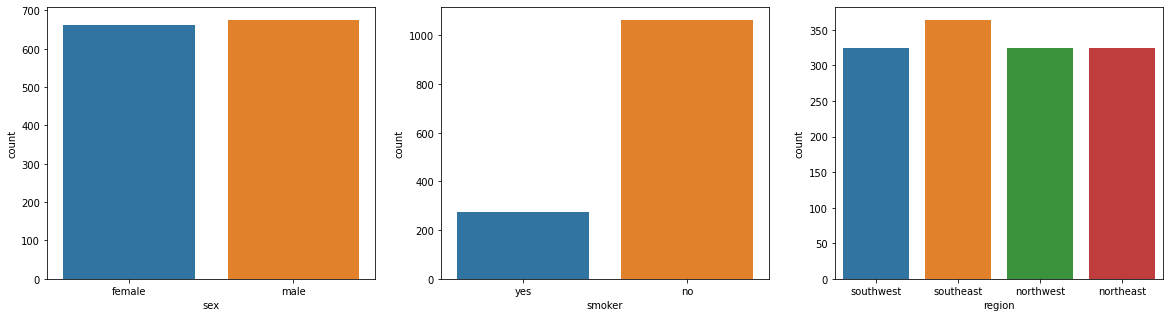

In [14]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
for n, feat in enumerate(cat_feats):
    sns.countplot(x=feat, data=df, ax=ax[n])

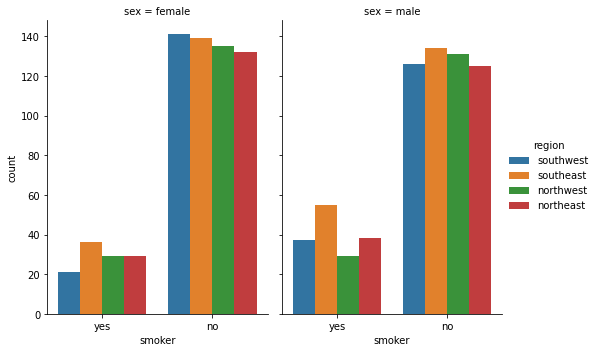

In [15]:
sns.catplot(x="smoker", hue="region", col="sex",
                data=df, kind="count",
                aspect=.7)

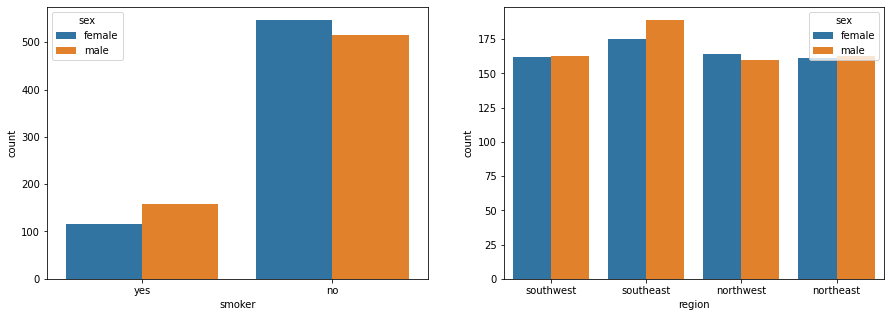

In [16]:
_, ax = plt.subplots(1, 2, figsize=(15,5))
plot = ['smoker', 'region']
for n, feat in enumerate(plot):
    sns.countplot(x=feat, hue = 'sex', data=df, ax=ax[n])

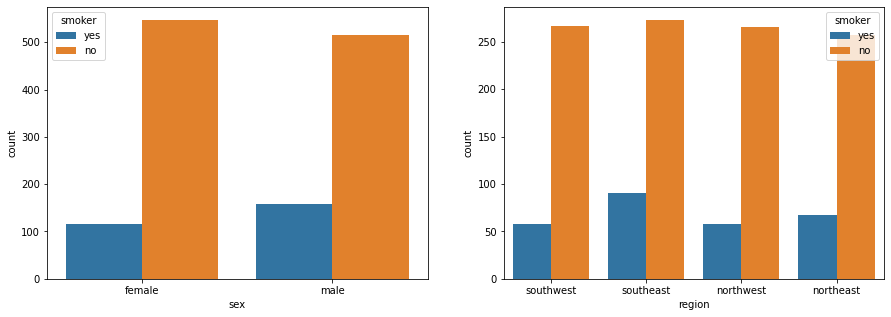

In [17]:
_, ax = plt.subplots(1, 2, figsize=(15,5))
plot = ['sex', 'region']
for n, feat in enumerate(plot):
    sns.countplot(x=feat, hue = 'smoker', data=df, ax=ax[n])

6. Relationship between Categorical Features and Label

In [18]:
df.groupby('sex')['charges'].sum().astype(int)

sex
female    8321061
male      9433124
Name: charges, dtype: int32

In [19]:
df.groupby('smoker')['charges'].sum().astype(int)

smoker
no     8972421
yes    8781763
Name: charges, dtype: int32

In [20]:
df.groupby('region')['charges'].sum().astype(int)

region
northeast    4343668
northwest    4034072
southeast    5363689
southwest    4012754
Name: charges, dtype: int32

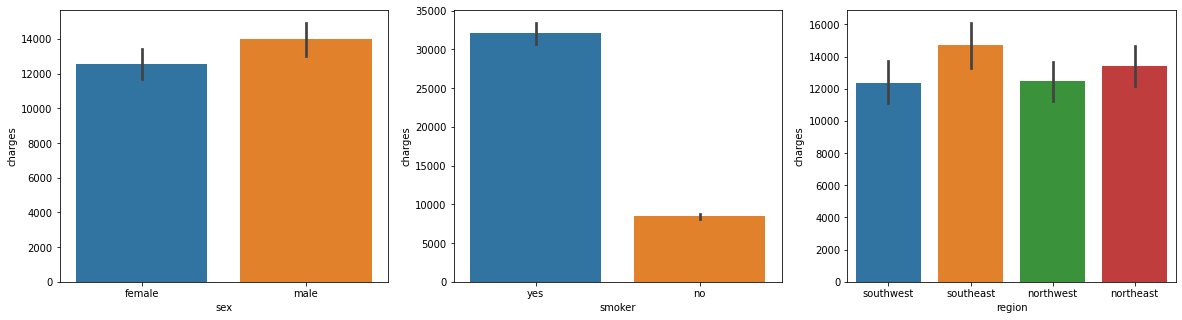

In [21]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
for n, feat in enumerate(cat_feats):
    sns.barplot(x=feat, y= 'charges', data=df, ax=ax[n])

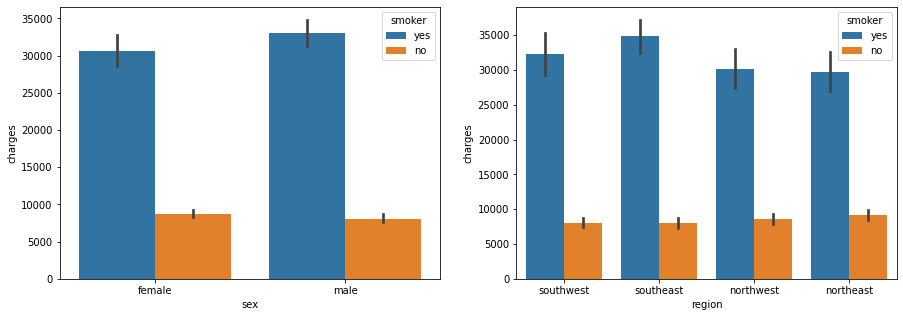

In [22]:
_, ax = plt.subplots(1, 2, figsize=(15,5))
plot = ['sex', 'region']
for n, feat in enumerate(plot):
    sns.barplot(x=feat,y = 'charges', hue = 'smoker', data=df, ax=ax[n])

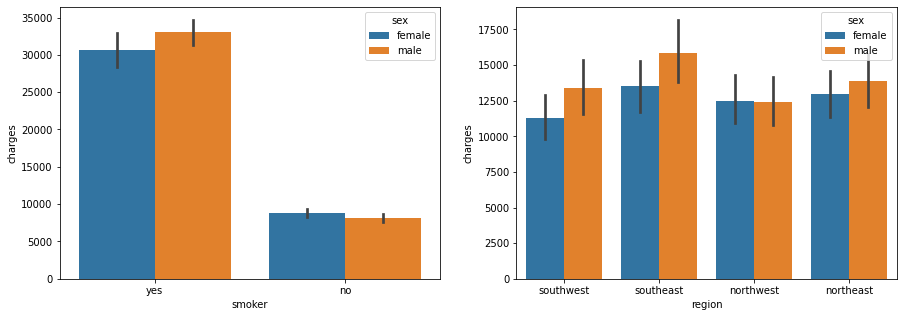

In [23]:
_, ax = plt.subplots(1, 2, figsize=(15,5))
plot = ['smoker', 'region']
for n, feat in enumerate(plot):
    sns.barplot(x=feat,y = 'charges', hue = 'sex', data=df, ax=ax[n])

### Take-Away



7. Explore the Numerical Features

In [24]:
#num_feats = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_feats = list(set(df.columns) - set(cat_feats) - {'charges'})
num_feats

['children', 'bmi', 'age']

8. Find Discrete Numerical Features and Distribution

In [25]:
discrete_feats=[feature for feature in num_feats if len(df[feature].unique())<25]
print("Discrete variables \n Count: %s \n Variables: %s"%(len(discrete_feats), discrete_feats[0]))

Discrete variables 
 Count: 1 
 Variables: children


In [26]:
print("Unique val num: ", df['children'].nunique())
print("Unique values : ", df['children'].unique())

Unique val num:  6
Unique values :  [0 1 3 2 5 4]


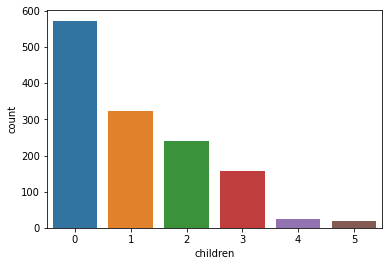

In [27]:
sns.countplot(x=df['children'])

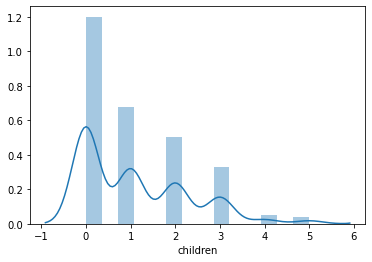

In [28]:
sns.distplot(df['children'])

9. Relation between Discrete numerical Features and Labels

In [29]:
children = df.groupby('children')['charges'].sum().astype(int)
children

children
0    7096430
1    4124899
2    3617655
3    2410784
4     346266
5     158148
Name: charges, dtype: int32

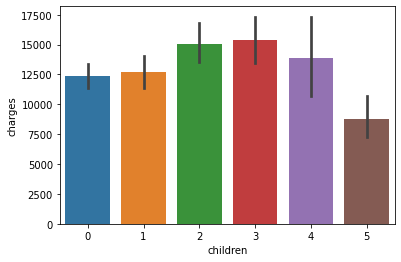

In [30]:
sns.barplot(x = 'children', y= 'charges', data = df)

### Take-away:

10. Find Continous Numerical Features

In [31]:
continuous_feats=[feature for feature in num_feats if feature not in discrete_feats+['Chargess']]
print("Continuous Variables: {}".format(continuous_feats))

Continuous Variables: ['bmi', 'age']


11. Distribution of Continous Numerical Features

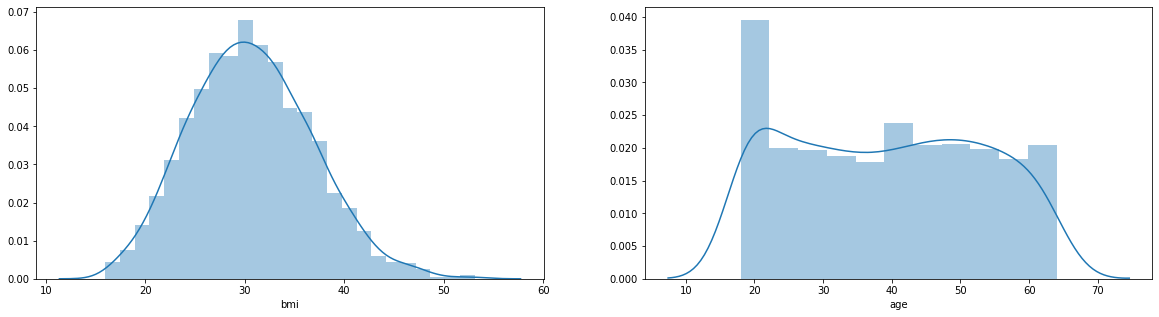

In [32]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
for n, feat in enumerate(continuous_feats):
    sns.distplot(df[feat], ax=ax[n])

12. Relation between Continous numerical Features and Labels

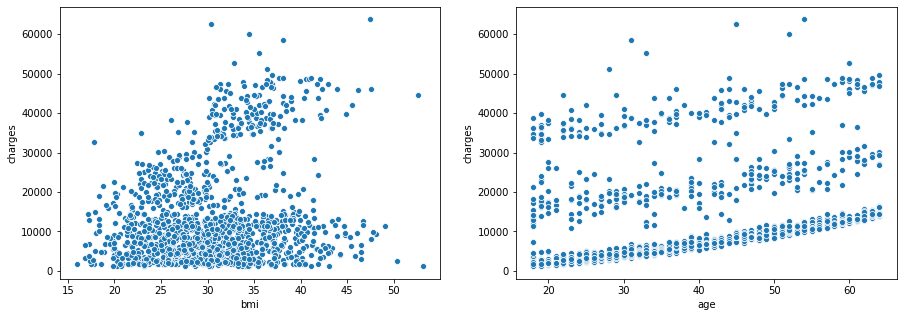

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for n, feat in enumerate(continuous_feats):
    sns.scatterplot(x=df[feat], y=df['charges'], ax=ax[n])

13. Find Outliers in numerical features

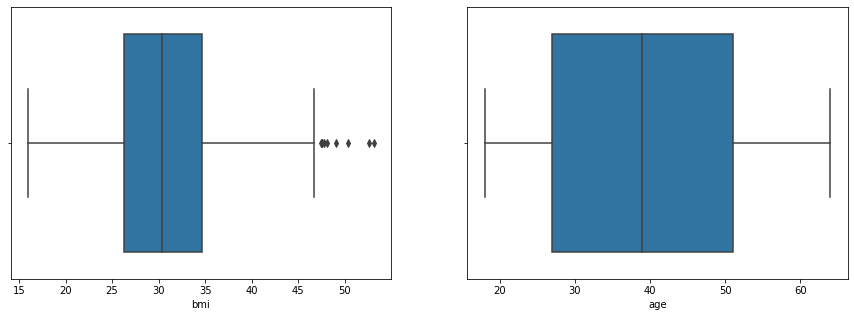

In [34]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for n, feat in enumerate(continuous_feats):
    sns.boxplot(x=df[feat], ax=ax[n])

In [35]:
def outliers(ds):
    def outliers_iqr(ys):
        quartile_1, quartile_3 = np.percentile(ys, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        return np.where((ys > upper_bound) | (ys < lower_bound))
    
    
    for i in ds:
        if (ds[i].dtypes == 'float64' or ds[i].dtypes == 'int64'):
            out=list(outliers_iqr(ds[i]))
            if out[0].size:
                print("*****************************************")
                print("Variable \"", i ,"\" has following ", len(out[0]), " outliers, which is ", (len(out[0])/len(ds[i]))*100," %.")
                #for j in out[0]:
                #    print("        Outlier value at",j,"th position is", ds[i].loc[j])
                print("Outlier at 5% ", (np.percentile(ds[i],[5]))[0])
                print("Outlier at 95% ", (np.percentile(ds[i],[95]))[0])
outliers(df[num_feats])

*****************************************
Variable " bmi " has following  9  outliers, which is  0.6731488406881078  %.
Outlier at 5%  21.248
Outlier at 95%  41.108000000000004


14. Explore the Correlation between numerical features

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

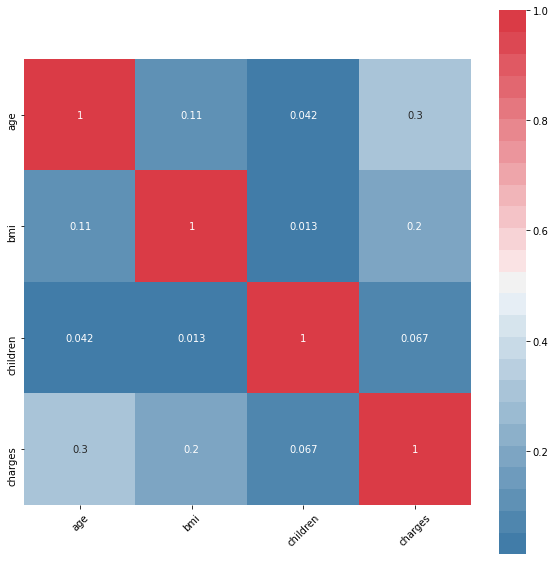

In [36]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(df.corr(), 
            annot=True,
            cmap=sns.diverging_palette(240, 10, n=25), 
            square=True, ax=ax)
plt.xticks(rotation=45)

## 3. Data Preprocessing   
### a. Data Cleansing/wrangling/munging
        
    Handle Missing Values
        
    Remove Outliers
        
        As per Exploratory Data Analysis EDA
        
            No missing value found

            Passengers and Promotion_Budget columns have outliers

def outliers_treatment(ds):
    def outliers_iqr(ys):
        quartile_1, quartile_3 = np.percentile(ys, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        return np.where((ys > upper_bound) | (ys < lower_bound))
    
    
    for i in ds:
        if (ds[i].dtypes == 'float64' or ds[i].dtypes == 'int64'):
            out=list(outliers_iqr(ds[i]))
            if out[0].size:
                #print("*****************************************")
                #print("Variable \"", i ,"\" has following ", len(out[0]), " outliers, which is ", (len(out[0])/len(ds[i]))*100," %.")
                #for j in out[0]:
                #    print("        Outlier value at",j,"th position is", ds1[i].loc[j])
                print("Outlier at 5% ", (np.percentile(ds[i],[5]))[0])
                print("Outlier at 95% ", (np.percentile(ds[i],[95]))[0])
                if((len(out[0])/len(ds[i]))*100 > 1):
                    lower_bound=(np.percentile(ds[i],[5]))[0]
                    upper_bound=(np.percentile(ds[i],[95]))[0]
                    ds[i][ds[i] <= lower_bound]=lower_bound
                    ds[i][ds[i] >= upper_bound]=upper_bound
                elif((len(out[0])/len(ds[i]))*100 <= 1):
                    median_value=ds[i].median()
                    lower_bound=(np.percentile(ds[i],[5]))[0]
                    upper_bound=(np.percentile(ds[i],[95]))[0]
                    ds[i][ds[i] <= lower_bound]=median_value
                    ds[i][ds[i] >= upper_bound]=median_value
outliers_treatment(df)                  

### b. Feature Engineering with Pipeline
 
    Drop unwanted Features
    
    Handle Feature Scalling
    
    Handle Categorical Features

these is no unwanted column present in given dataset to remove

categorical features:
     
    Sex and Smoker have two unique values(Binary/One-Hot Encoding)
    Region has 4 unique values(One-Hot Encoding)

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [38]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [39]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_feats: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    num_pipeline = Pipeline([
                            ('selector', DataFrameSelector(num_feats)),
                            ('std_scaler', StandardScaler())
                        ])
    return num_pipeline

def cat_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_feats: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    cat_pipeline = Pipeline([
                            ('selector', DataFrameSelector(cat_feats)),
                            ('Label_Encoding',LabelEncoder()),
        #OneHotEncoder()
                        ])
    print(DataFrameSelector(cat_feats))
    print(LabelEncoder())
    print(cat_pipeline)
    return cat_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        df: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    num_pipeline = num_pipeline_transformer(data)
    cat_pipeline = cat_pipeline_transformer(data)
    full_pipeline = FeatureUnion(transformer_list=[
                                ('num_pipeline', num_pipeline),
                                ('cat_pipeline', cat_pipeline)
                            ])
    return full_pipeline.fit_transform(data)

## 4.Model Selection using GridSearchCV 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def data_preprocess(df):
    X = df[num_feats+cat_feats]
    y = df['charges']
    X_prep = pipeline_transformer(X)
    X_train, X_test, y_train, y_test = train_test_split(X_prep,y,test_size=0.2, random_state=0)
    
    return X_train, X_test, y_train, y_test

def find_best_model_using_gridsearchcv(X,y): 
    algos = {
        'Linear_Regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor': {
            'model':  RandomForestRegressor(),
            'params': {
                'n_estimators': [3, 10, 30],
                'max_features': [2, 4, 6, 8]
        
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best_Score': gs.best_score_,
            'Best_Params': gs.best_params_,
            'Best_Model':gs.best_estimator_
        })
        model_df = pd.DataFrame(scores,columns=['Model','Best_Score','Best_Params','Best_Model'])
    return model_df

## 5. Model Building

def model(df):
    X_train, X_test, y_train, y_test = data_preprocess(df)
    model_df = find_best_model_using_gridsearchcv(X_train,y_train)
    model = model_df.loc[model_df['Best_Score'].idxmax()]
    reg = model['Best_Model']
    
    return reg

X_train, X_test, y_train, y_test = data_preprocess(df)
model_df = find_best_model_using_gridsearchcv(X_train,y_train)
model = model_df.loc[model_df['Best_Score'].idxmax()]
reg = model['Best_Model']

In [41]:
X = df[num_feats+cat_feats]
y = df['charges']
X_prep = pipeline_transformer(X)
X_train, X_test, y_train, y_test = train_test_split(X_prep,y,test_size=0.2, random_state=0)

DataFrameSelector(attribute_names=['sex', 'smoker', 'region'])
LabelEncoder()
Pipeline(memory=None,
         steps=[('selector',
                 DataFrameSelector(attribute_names=['sex', 'smoker',
                                                    'region'])),
                ('Label_Encoding', LabelEncoder())],
         verbose=False)


TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(X_train,y_train)

In [ ]:
final_model = grid_search.best_estimator_

final_model.predict(X_test)

## 6. Model Evaluation

In [ ]:
def final_model(df):
    
    #reg = model(df)
    
    reg.fit(X_train, y_train)
    
    train_pred= reg.predict(X_train)
    train_score = reg.score(X_train,y_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_rmse = np.sqrt(train_mse)

    test_pred= reg.predict(X_test)
    test_score = reg.score(X_test,y_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_rmse = np.sqrt(test_mse)
    
    print("Train")
    print("Score:", train_score)
    print("Error:", train_rmse)

    print("Test")
    print("Score:", test_score)
    print("Error:", test_rmse)

In [ ]:
final_model(df)

In [ ]:
def insurance_qoute(info, model):
    
    if type(info) == dict:
        test_df = pd.DataFrame(info)
    else:
        test_df = info
    
    prepared_data = pipeline_transformer(test_df)
    #d = dict(prepared_data)
    #abc = pd.DataFrame()
    pred = lin_reg.predict(prepared_data)
    print(test_df)
    print(prepared_data)
    
    return pred

In [ ]:
info = {
    
        'children':[1],
        'bmi': [29.98],
        'age': [19],
        'sex': ['male'],
        'smoker':['Yes'],
        'region': ['Southeast']

}
test_df = pd.DataFrame(info)
prepared = pipeline_transformer(test_df)
final_model.predict(prepared)
#insurance_qoute(info, lin_reg)

In [ ]:
import pickle


##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(insurance_quote, f_out)
    f_out.close()

In [ ]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)